# Stock Market Dashboard
**Author:** Priyanshu  
**Summary:** Fetch stock prices, compute moving averages & returns, visualize price, volume, and correlations.


In [18]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Plot defaults
plt.rcParams['figure.figsize'] = (12,6)
sns.set_style("darkgrid")


In [19]:
# Choose stock(s)
single_ticker = "AAPL"
multi_tickers = ["AAPL", "MSFT", "GOOG", "AMZN"]

# Date range
start_date = "2022-01-01"
end_date = datetime.today().strftime("%Y-%m-%d")


In [20]:
# Fetch Apple stock data
data = yf.download(single_ticker, start=start_date, end=end_date, progress=False, auto_adjust=True)
data.head()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-01-03,178.443146,179.296107,174.227425,174.345068,104487900
2022-01-04,176.178391,179.354901,175.609755,179.050979,99310400
2022-01-05,171.492065,176.639180,171.217554,176.090157,94537600
2022-01-06,168.629318,171.864651,168.276373,169.315597,96904000
2022-01-07,168.795975,170.727370,167.678316,169.501866,86709100


In [21]:
# Daily returns
data["Daily Return"] = data["Close"].pct_change()

# Moving averages
data["50 MA"] = data["Close"].rolling(50).mean()
data["200 MA"] = data["Close"].rolling(200).mean()

data.tail()


Price,Close,High,Low,Open,Volume,Daily Return,50 MA,200 MA
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,
Date,,,,,,,,
2025-08-29,232.139999,233.380005,231.369995,232.509995,39418400,-0.001806,215.381387,220.674412
2025-09-02,229.720001,230.850006,226.970001,229.250000,44075600,-0.010425,215.960344,220.705828
2025-09-03,238.470001,238.850006,234.360001,237.210007,66427800,0.038090,216.704312,220.780994
2025-09-04,239.779999,239.899994,236.740005,238.449997,47549400,0.005493,217.498454,220.858276
2025-09-05,239.690002,241.320007,238.490005,240.000000,54837300,-0.000375,218.265623,220.919662


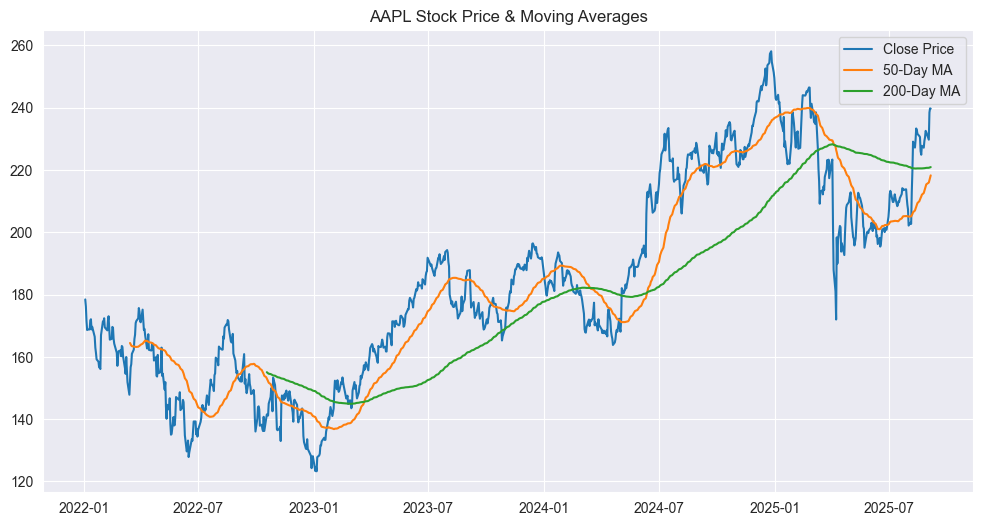

In [24]:
plt.figure(figsize=(12,6))
plt.plot(data["Close"], label="Close Price")
plt.plot(data["50 MA"], label="50-Day MA")
plt.plot(data["200 MA"], label="200-Day MA")
plt.legend()
plt.title(f"{single_ticker} Stock Price & Moving Averages")
plt.show()


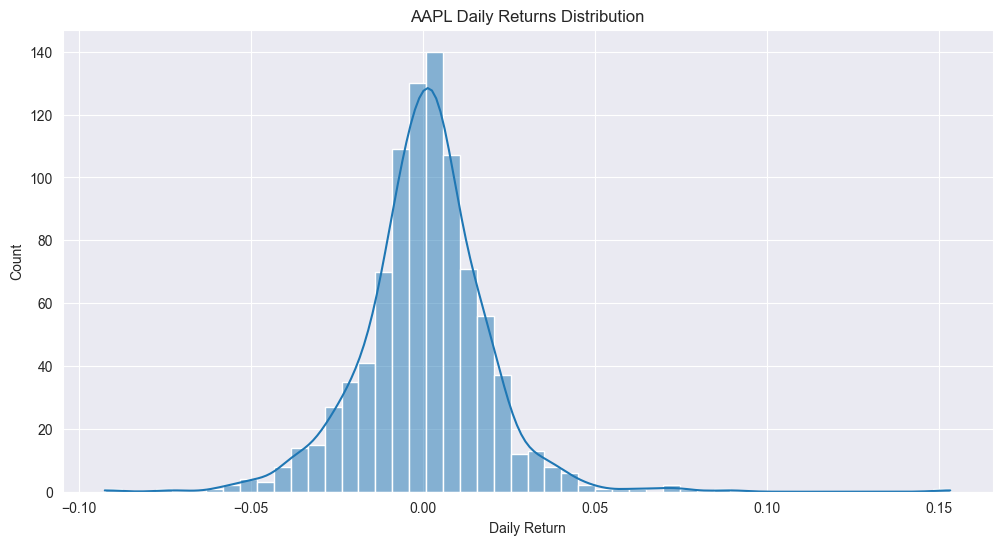

In [31]:
sns.histplot(data["Daily Return"], bins=50, kde=True)
plt.title(f"{single_ticker} Daily Returns Distribution")
plt.show()


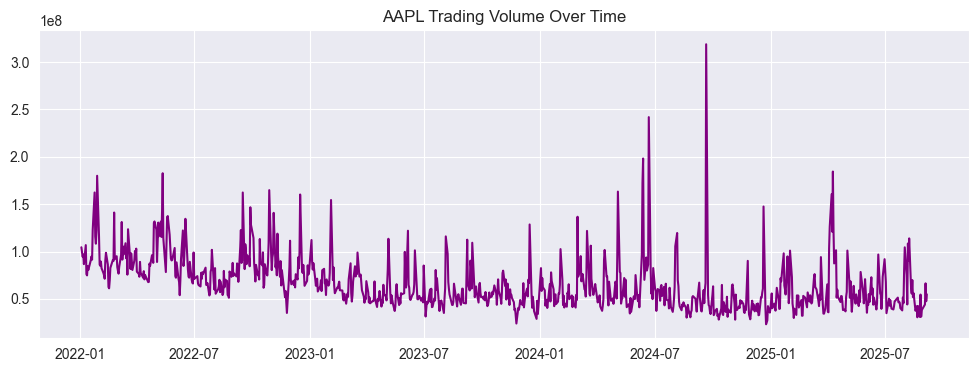

In [26]:
plt.figure(figsize=(12,4))
plt.plot(data.index, data["Volume"], color="purple")
plt.title(f"{single_ticker} Trading Volume Over Time")
plt.show()


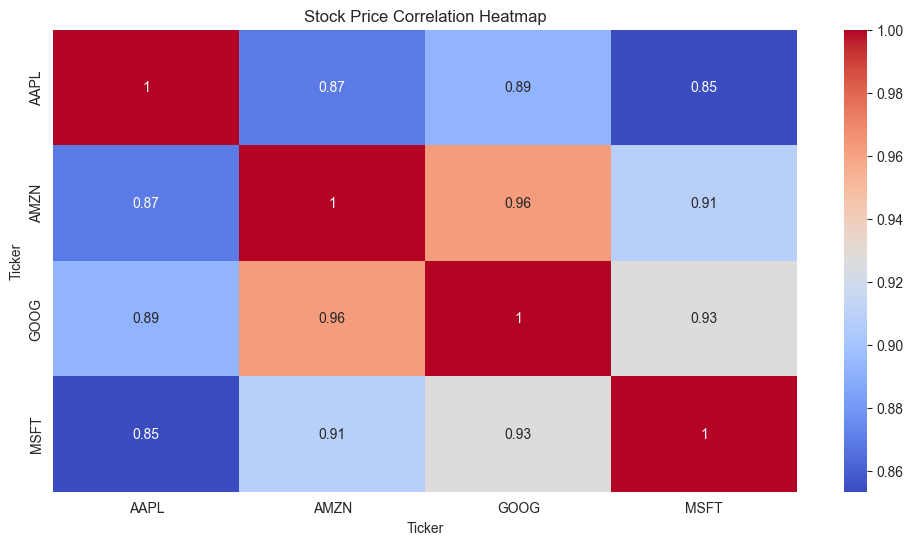

In [27]:
# Fetch multiple stocks
panel = yf.download(multi_tickers, start=start_date, end=end_date, progress=False, auto_adjust=True)["Close"]

# Compute correlation heatmap
sns.heatmap(panel.corr(), annot=True, cmap="coolwarm")
plt.title("Stock Price Correlation Heatmap")
plt.show()


Saved processed data as processed_AAPL.csv


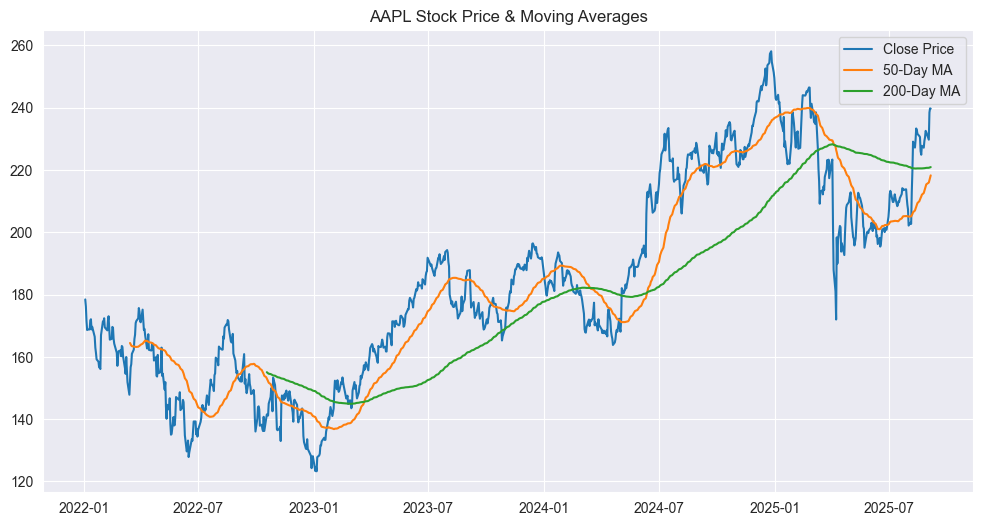

In [28]:
# Save processed data
data.to_csv(f"processed_{single_ticker}.csv")
print(f"Saved processed data as processed_{single_ticker}.csv")

# Save plots (example)
plt.figure(figsize=(12,6))
plt.plot(data["Close"], label="Close Price")
plt.plot(data["50 MA"], label="50-Day MA")
plt.plot(data["200 MA"], label="200-Day MA")
plt.legend()
plt.title(f"{single_ticker} Stock Price & Moving Averages")
plt.savefig(f"{single_ticker}_price_ma.png")
plt.show()
